# 4. Otro algoritmo de aprendizaje no supervisado
## t-SNE

t-SNE es ideal porque permite visualizar en 2D los 4 clusters y validar visualmente si están bien separados. Con 13 variables numéricas es difícil visualizar la estructura, t-SNE la proyecta conservando las relaciones de vecindad local. Así puede mostrar gráficamente que los clusters tienen sentido, especialmente el cluster 2 de blockbusters que debería aparecer muy separado del resto. 

¿Por qué t-SNE?
Los otros tienen estos problemas aquí:

- SVD: útil para sistemas de recomendación con matrices usuario-ítem, pero no tenemos esa estructura
- UMAP: similar a t-SNE pero requiere instalación extra y t-SNE es más estándar en cursos
- ICA: busca fuentes independientes, útil para señales (audio, imágenes), no aporta mucho a datos de películas

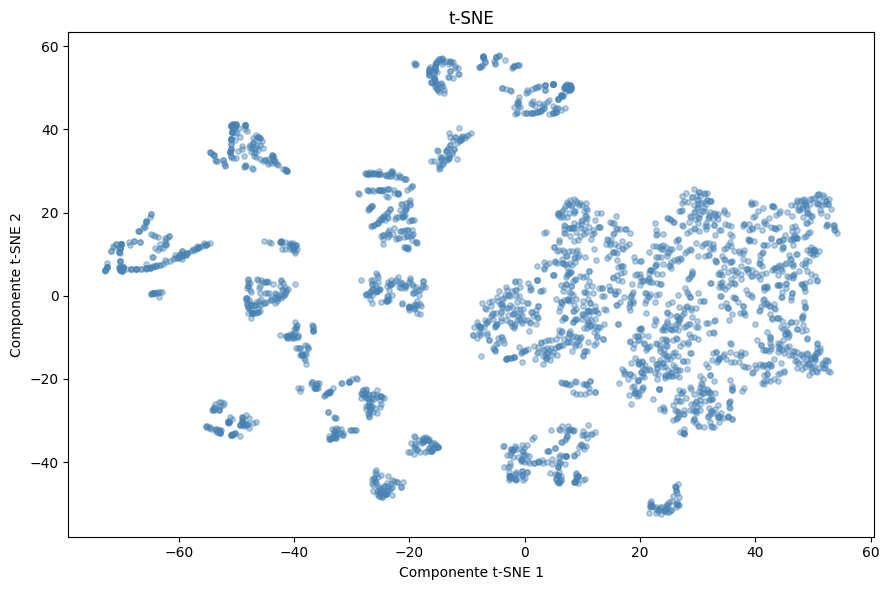

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Cargar datos
df = pd.read_csv('data/movies_2026.csv', encoding='latin1')

# Variables numéricas
num_vars = ['popularity', 'budget', 'revenue', 'runtime',
            'voteAvg', 'voteCount', 'genresAmount',
            'productionCoAmount', 'productionCountriesAmount',
            'actorsAmount', 'castWomenAmount', 'castMenAmount',
            'releaseYear']

df_cluster = df[num_vars].copy()
df_cluster.dropna(inplace=True)

# Normalizar
scaler = StandardScaler()
X = scaler.fit_transform(df_cluster)

# Muestra para t-SNE
np.random.seed(123)
n_tsne = 3000
idx_tsne = np.random.choice(len(X), n_tsne, replace=False)
X_tsne = X[idx_tsne]

# Aplicar t-SNE
tsne = TSNE(
    n_components=2,   # proyectar a 2D para visualizar
    random_state=123, # reproducibilidad
    perplexity=30,    # balance estructura local/global, default recomendado
    max_iter=1000     # iteraciones para convergencia
)
X_embedded = tsne.fit_transform(X_tsne)

# Graficar
plt.figure(figsize=(9, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], alpha=0.4, s=15, color='steelblue')
plt.title('t-SNE')
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.tight_layout()
plt.show()